In [2]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import requests
import json

In [5]:
df = pd.read_excel(r'C:\Users\juand\OneDrive\Documentos\Proyecto Modelo Codigo\api-monitoreo-financiero\src\data\DEUDA.xlsx')
df.head()

,Fecha,Moneda,Interna1_Billo,Externa_Billo,Total_Billo
0,2018-01-31,1,"273,6","137,9","411,5"
1,2018-02-28,1,"279,1","138,3","417,3"
2,2018-03-31,1,"280,6","136,6","417,1"
3,2018-04-30,1,"287,8","138,0","425,8"
4,2018-05-31,1,"293,7","140,6","434,4"


In [6]:
df.shape
df.isnull().sum()

Fecha             0
Moneda            0
Interna1_Billo    0
Externa_Billo     0
Total_Billo       0
dtype: int64

In [9]:
df['ds'] = pd.to_datetime(df['Fecha'],format='%Y%m%d')
print(df)

        Fecha  Moneda Interna1_Billo Externa_Billo Total_Billo         ds
0  2018-01-31       1          273,6         137,9       411,5 2018-01-31
1  2018-02-28       1          279,1         138,3       417,3 2018-02-28
2  2018-03-31       1          280,6         136,6       417,1 2018-03-31
3  2018-04-30       1          287,8         138,0       425,8 2018-04-30
4  2018-05-31       1          293,7         140,6       434,4 2018-05-31
..        ...     ...            ...           ...         ...        ...
62 2022-10-31       1          495,9         353,0       848,9 2022-10-31
63 2022-12-31       1          507,3         365,5       872,7 2022-12-31
64 2023-01-31       1          513,9         353,0       867,0 2023-01-31
65 2023-02-28       1          509,6         373,9       883,4 2023-02-28
66 2023-04-30       1          532,0         359,1       891,1 2023-04-30

[67 rows x 6 columns]


In [11]:
df['y']= pd.to_numeric(df['Externa_Billo'].str.replace(',', '.'), errors='coerce')

In [13]:
m= Prophet()
m.fit(df)

15:20:26 - cmdstanpy - INFO - Chain [1] start processing
15:20:27 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=1,freq='M')
future.tail()

,ds
63,2023-05-31
64,2023-06-30
65,2023-07-31
66,2023-08-31
67,2023-09-30


In [16]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,133.346112,116.022828,151.352809
1,2018-02-28,132.418637,115.475845,149.973382
2,2018-03-31,131.534445,114.468452,149.656490
3,2018-04-30,136.483869,118.807682,155.652873
4,2018-05-31,132.386120,113.882816,149.260137
...,...,...,...,...
63,2023-05-31,348.401213,331.596689,365.955588
64,2023-06-30,344.323315,326.236975,362.887087
65,2023-07-31,340.883045,324.079760,359.079501
66,2023-08-31,348.091514,330.732537,366.452110


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


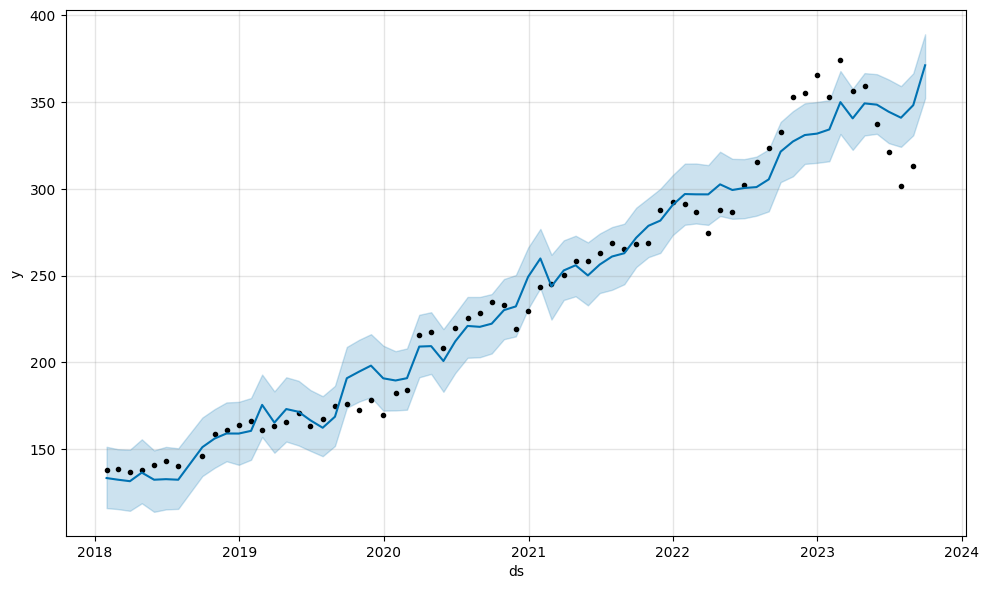

In [17]:
fig1= m.plot(forecast)

In [18]:
args = forecast[['ds','yhat','yhat_lower', 'yhat_upper']]

In [26]:
df['y']= pd.to_numeric(df['Interna1_Billo'].str.replace(',', '.'), errors='coerce')


In [30]:
m2= Prophet()
m2.fit(df)

15:32:21 - cmdstanpy - INFO - Chain [1] start processing
15:32:21 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future2 = m2.make_future_dataframe(periods=7,freq='M')
future2.tail()

,ds
69,2023-11-30
70,2023-12-31
71,2024-01-31
72,2024-02-29
73,2024-03-31


In [49]:
forecast2=m2.predict(future2)
forecast2[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,274.691549,271.699086,278.061919
1,2018-02-28,279.185502,275.942088,282.591354
2,2018-03-31,282.904239,279.575009,286.127508
3,2018-04-30,287.647714,284.337548,290.885785
4,2018-05-31,293.991611,290.711879,297.287929
...,...,...,...,...
69,2023-11-30,572.638524,569.321201,576.051520
70,2023-12-31,572.546905,569.284106,576.060529
71,2024-01-31,586.753125,583.081055,590.499687
72,2024-02-29,593.616064,589.606324,597.459212


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


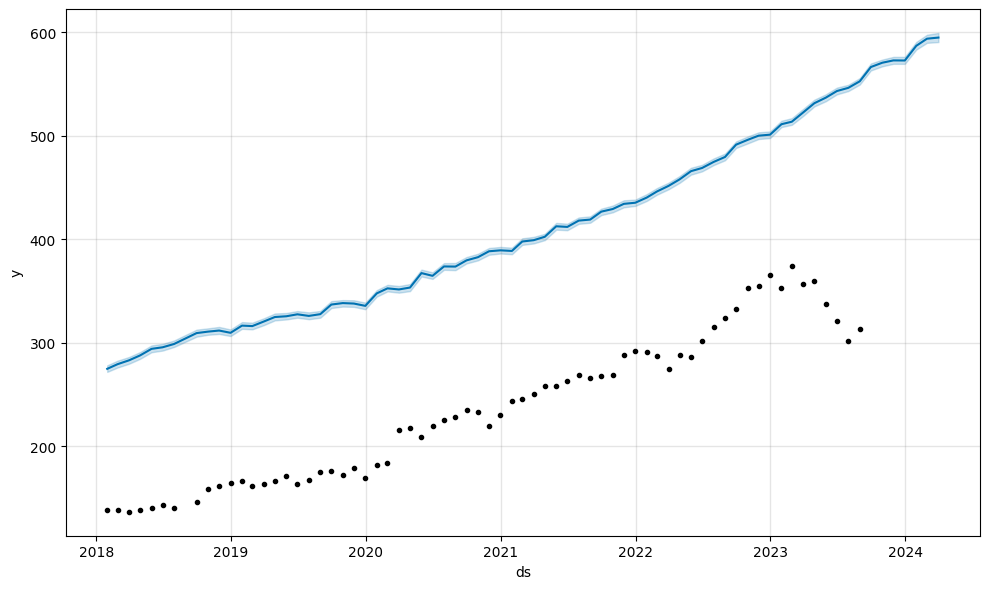

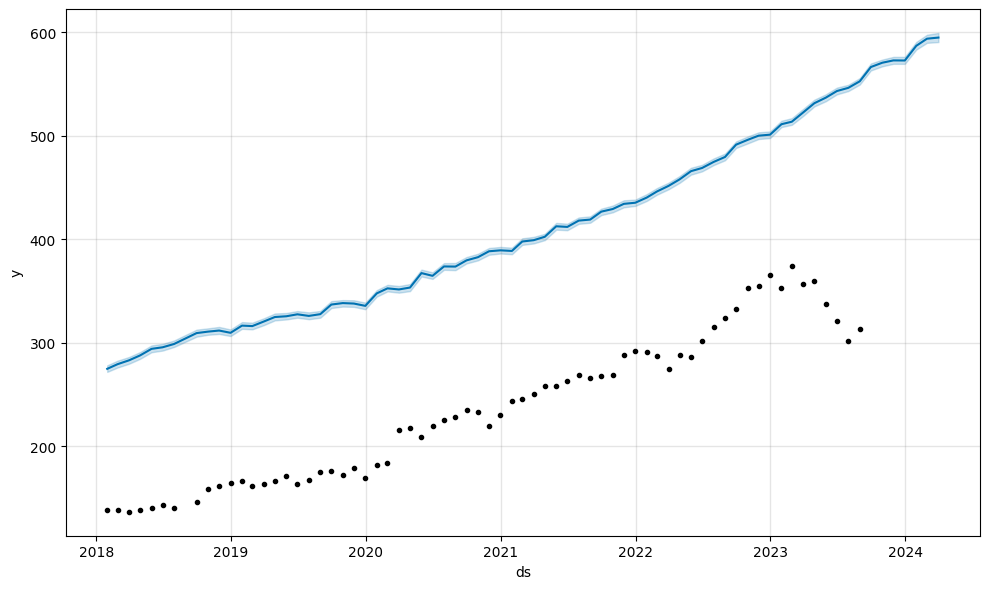

In [50]:
args2 = forecast2[['ds','yhat','yhat_lower', 'yhat_upper']]
m.plot(forecast2)